In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pytrends.request import TrendReq
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, RobustScaler
import datetime

### Load Data

In [239]:
train = pd.read_csv("ML Intern Homework/intern_homework_train_dataset.csv")
valid = pd.read_csv("ML Intern Homework/intern_homework_public_test_dataset.csv")

# Add new features

train["increasing"] = (train["like_count_6h"] - train["like_count_1h"])
valid["increasing"] = (valid["like_count_6h"] - valid["like_count_1h"]) 

In [240]:
# Remove outliers

train = train[train["like_count_24h"] < train["like_count_24h"].quantile(0.99)]

# Log transform

train["like_count_4h"] = np.log1p(train["like_count_4h"])
train["like_count_5h"] = np.log1p(train["like_count_5h"])
train["like_count_6h"] = np.log1p(train["like_count_6h"])
train["like_count_24h"] = np.log1p(train["like_count_24h"])

valid["like_count_4h"] = np.log1p(valid["like_count_4h"])
valid["like_count_5h"] = np.log1p(valid["like_count_5h"])
valid["like_count_6h"] = np.log1p(valid["like_count_6h"])
valid["like_count_24h"] = np.log1p(valid["like_count_24h"])

# Split data
x_train = train.loc[
    :, ["like_count_4h", "like_count_5h", "like_count_6h", "increasing"]
].to_numpy()
y_train = train["like_count_24h"].to_numpy()

x_valid = valid.loc[
    :, ["like_count_4h", "like_count_5h", "like_count_6h", "increasing"]
].to_numpy()
y_valid = valid["like_count_24h"].to_numpy()

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_valid = scaler.transform(x_valid)

print(x_train.shape)
print(x_valid.shape)

(49500, 4)
(10000, 4)


### Show Correlation

/var/folders/nc/zmjfff853y33j17lwwdk299w0000gn/T/ipykernel_77305/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

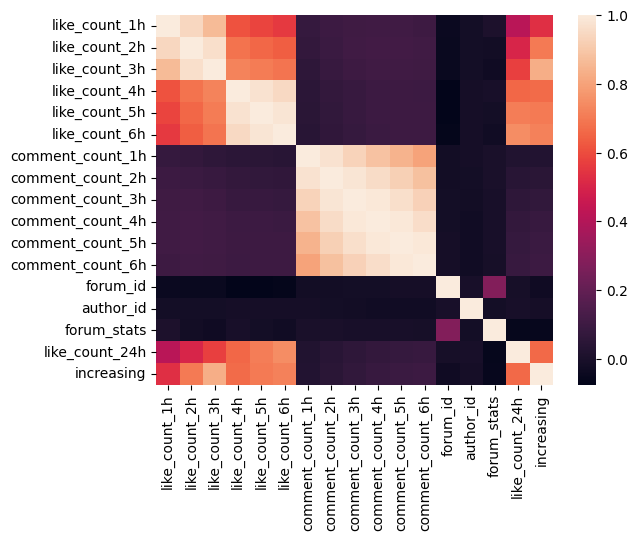

In [222]:
sns.heatmap(train.corr())

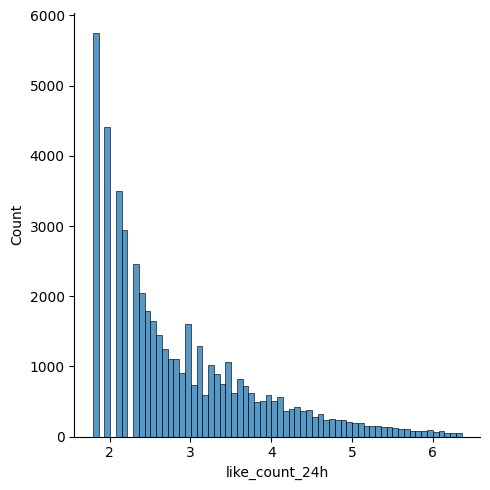

In [235]:
sns.displot((train["like_count_24h"]))

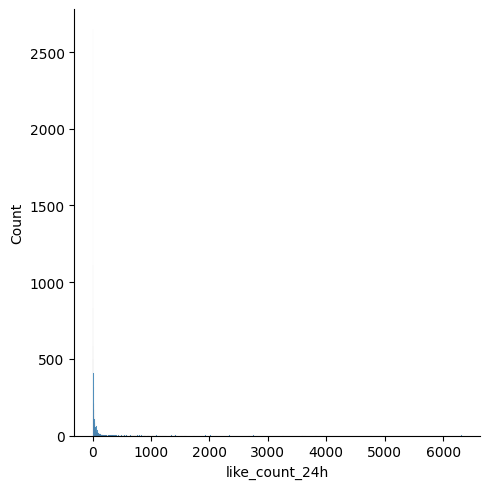

In [210]:
sns.displot(valid["like_count_24h"])

In [236]:
# Skewness and Kurtosis
print("Skewness: %f" % train['like_count_24h'].skew())
print("Kurtosis: %f" % train['like_count_24h'].kurt())

Skewness: 1.095501
Kurtosis: 0.715904


### Models

In [243]:
xgboost = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.1,
    max_depth=5,
)
xgboost.fit(x_train, y_train)

y_pred = xgboost.predict(x_valid)
mape = mean_absolute_percentage_error(y_valid, y_pred)

print(f"MAPE: {mape}")

MAPE: 0.14348205364435226


In [244]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
mape = mean_absolute_percentage_error(y_valid, y_pred)
print(f"MAPE: {mape}")


MAPE: 0.17063849601717218


In [ ]:
test = pd.read_csv("ML Intern Homework/intern_homework_private_test_dataset.csv")
x_test = test.loc[:, ["like_count_4h", "like_count_5h", "like_count_6h", "increasing"]].to_numpy()

x_test = scaler.transform(x_test)

MAPE: 0.6371858469094819
